<h1>Hotel Check-in Prediction

<h1>Name - Alan Joe Anil

<h2>Evaluation for Junior Data Scientist at NextGrowthLabs Pvt Ltd

<h4>Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<h4>Read CSV file

In [2]:
train = pd.read_csv("/content/drive/MyDrive/col/hotel_booking/train_data_evaluation_part_2.csv")
test = pd.read_csv("/content/drive/MyDrive/col/hotel_booking/test_data_evaluation_part2.csv")

In [3]:
print(train.shape, test.shape)

(82580, 30) (1000, 30)


<h4>Combine test and train into one file

In [4]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(82580, 31) (1000, 31) (83580, 31)


In [5]:
data.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,source
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,train
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,train
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,train
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,train
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,train


drope unnamed column

In [6]:
data = data.drop('Unnamed: 0', axis=1)

<h3>Train data

In [7]:
df = train

In [8]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,source
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,train
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,train
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,train
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,train


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82580 non-null  int64  
 1   Nationality           82580 non-null  object 
 2   Age                   78834 non-null  float64
 3   DaysSinceCreation     82580 non-null  int64  
 4   AverageLeadTime       82580 non-null  int64  
 5   LodgingRevenue        82580 non-null  float64
 6   OtherRevenue          82580 non-null  float64
 7   BookingsCanceled      82580 non-null  int64  
 8   BookingsNoShowed      82580 non-null  int64  
 9   BookingsCheckedIn     82580 non-null  int64  
 10  PersonsNights         82580 non-null  int64  
 11  RoomNights            82580 non-null  int64  
 12  DaysSinceLastStay     82580 non-null  int64  
 13  DaysSinceFirstStay    82580 non-null  int64  
 14  DistributionChannel   82580 non-null  object 
 15  MarketSegment      

<h4>Display Categorical and Numeric

In [11]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Nationality', 'DistributionChannel', 'MarketSegment', 'source'], dtype='object'),
 Index(['ID', 'Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
        'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
        'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
        'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
        'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
        'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
        'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
       dtype='object'))

<h4>Display all the unique values

In [12]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')

    
for col in df.columns:
    uniquevals(col)
    print("-"*100)

Details of the particular col ID is : [    1     2     3 ... 82578 82579 82580]
----------------------------------------------------------------------------------------------------
Details of the particular col Nationality is : ['PRT' 'DEU' 'FRA' 'JPN' 'IRL' 'ESP' 'BEL' 'NLD' 'AUT' 'ITA' 'CHN' 'RUS'
 'POL' 'USA' 'HUN' 'CRI' 'MEX' 'CHE' 'ROU' 'GBR' 'BIH' 'BRA' 'FIN' 'AGO'
 'CAN' 'ZAF' 'TWN' 'GRC' 'AUS' 'ISR' 'BGR' 'SAU' 'SWE' 'CYP' 'ARG' 'ARM'
 'CHL' 'MAR' 'MOZ' 'KOR' 'TUN' 'DNK' 'NOR' 'MYS' 'EGY' 'IND' 'HRV' 'CPV'
 'JOR' 'COD' 'DZA' 'LUX' 'TUR' 'IRN' 'LBY' 'PAN' 'COL' 'VEN' 'GNB' 'CZE'
 'AND' 'SVN' 'PER' 'ATF' 'UGA' 'AZE' 'NZL' 'LTU' 'SRB' 'EST' 'KAZ' 'KWT'
 'IDN' 'UKR' 'SVK' 'MLI' 'ARE' 'BGD' 'THA' 'TZA' 'LVA' 'PHL' 'BHR' 'NAM'
 'BOL' 'SGP' 'CMR' 'MLT' 'URY' 'PAK' 'JAM' 'ECU' 'SYC' 'QAT' 'PRY' 'BRB'
 'OMN' 'TMP' 'ABW' 'LBN' 'AIA' 'SLV' 'DMA' 'CUB' 'VNM' 'GEO' 'IRQ' 'GAB'
 'PYF' 'LIE' 'SEN' 'BLR' 'ISL' 'DOM' 'GUY' 'LCA' 'ATA' 'NGA' 'RWA' 'CIV'
 'ALB' 'MKD' 'MNE' 'GTM' 'GHA' 'MDV' 'MCO'

<h4>Find Missing Values

In [13]:
null_value = df.isnull().sum().sort_values(ascending=False)
null_value_per = df.isnull().mean().sort_values(ascending=False)*100

In [14]:
null_value_df = pd.DataFrame({
    "Features" : null_value.index,
    "No.of Missing_Value" :null_value.values,
    "Percentages of Missing_Value" : null_value_per.values
})
null_value_df

,Features,No.of Missing_Value,Percentages of Missing_Value
0,Age,3746,4.536207
1,ID,0,0.000000
2,SRHighFloor,0,0.000000
3,SRQuietRoom,0,0.000000
4,SRNoAlcoholInMiniBar,0,0.000000
5,SRAwayFromElevator,0,0.000000
6,SRNearElevator,0,0.000000
7,SRTwinBed,0,0.000000
8,SRKingSizeBed,0,0.000000
9,SRCrib,0,0.000000


<h1>Exploratory data analysis (EDA)

<h4>Top 20 Nationality

In [15]:
top_twenty=df['Nationality'].value_counts()[:20]
top_twenty.to_frame()

,Nationality
FRA,12307
PRT,11382
DEU,10164
GBR,8610
ESP,4864
USA,3398
ITA,3301
BEL,3111
BRA,2710
NLD,2698


<h4> Display Nationality they book more than 500 times

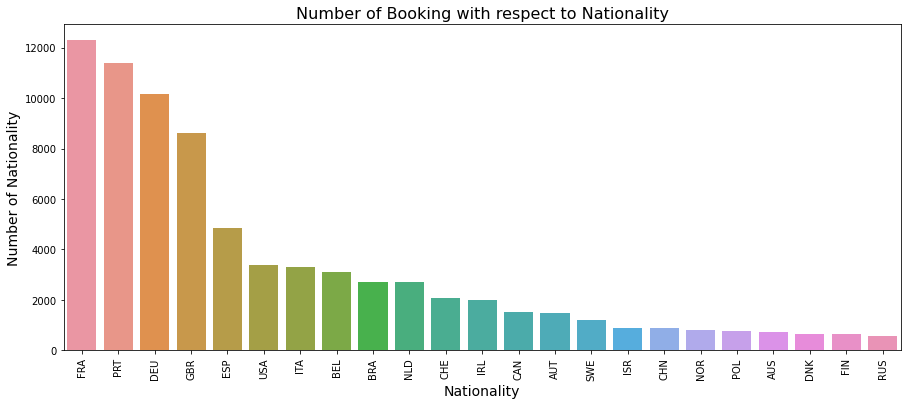

In [16]:
Nationality = df['Nationality'].value_counts()
Nationality = Nationality[(Nationality.values > 500)]
plt.figure(figsize=(15,6))
sns.barplot(Nationality.index, Nationality.values)
plt.xticks(rotation='vertical')
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Number of Nationality', fontsize=14)
plt.title("Number of Booking with respect to Nationality", fontsize=16)
plt.show()

In [17]:
df['BookingsCheckedIn'].value_counts()

1     61737
0     19394
2      1141
3       132
4        59
5        20
6        20
7        16
8        10
9         9
10        7
11        6
12        4
13        4
29        3
15        3
23        2
14        2
25        1
17        1
66        1
26        1
57        1
40        1
18        1
24        1
19        1
20        1
34        1
Name: BookingsCheckedIn, dtype: int64

count the unique value of BookingsCheckedIn

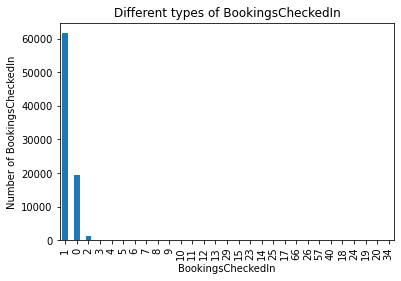

In [18]:
df['BookingsCheckedIn'].value_counts(normalize = True)
df['BookingsCheckedIn'].value_counts().plot.bar()
plt.title('Different types of BookingsCheckedIn')
plt.xlabel('BookingsCheckedIn')
plt.ylabel('Number of BookingsCheckedIn')
plt.show()

count the unique value Age

In [19]:
df['Age'].value_counts()

50.0     2015
51.0     2013
54.0     1965
53.0     1913
49.0     1871
         ... 
110.0       1
91.0        1
122.0       1
96.0        1
109.0       1
Name: Age, Length: 105, dtype: int64

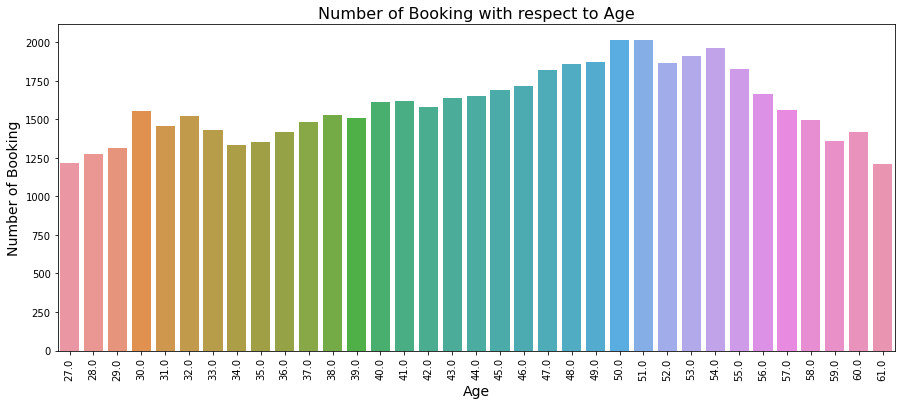

In [20]:
age1 = df['Age'].value_counts()
age1 = age1[(age1.values > 1200)]
plt.figure(figsize=(15,6))
sns.barplot(age1.index, age1.values)
plt.xticks(rotation='vertical')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Booking', fontsize=14)
plt.title("Number of Booking with respect to Age", fontsize=16)
plt.show()

Display Age who book more than 1200

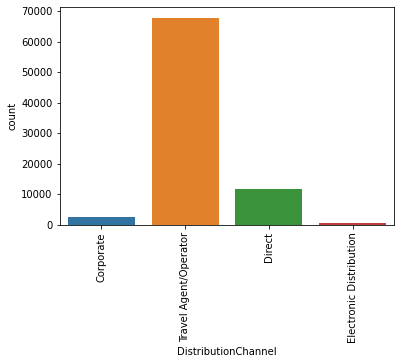

In [21]:
sns.countplot(x='DistributionChannel', data=df)
plt.rcParams['figure.figsize'] = (6,6)
plt.xticks(rotation=90)
#show the plot using 'plt.show()'
plt.show()

plot the DistributionChannel

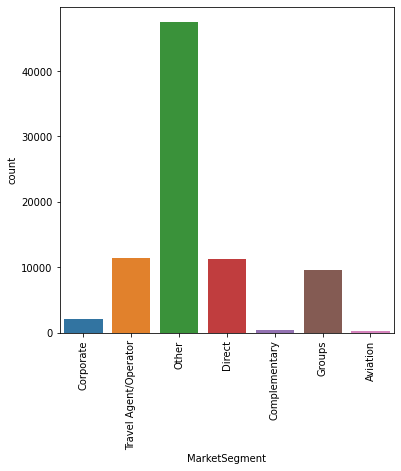

In [22]:
sns.countplot(x='MarketSegment', data=df)
plt.rcParams['figure.figsize'] = (10,10)
plt.xticks(rotation=90)
#show the plot using 'plt.show()'
plt.show()

plot the MarketSegment

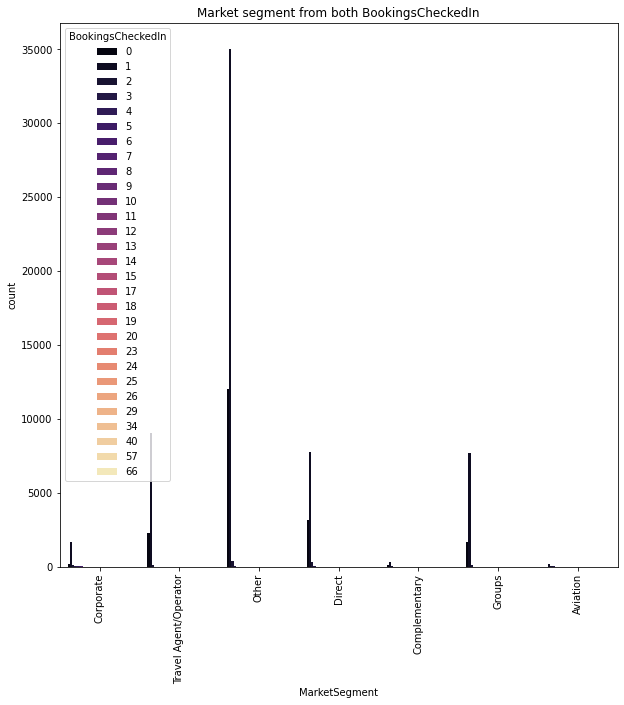

In [23]:
sns.countplot(x='MarketSegment', data=df, hue='BookingsCheckedIn', palette='magma')
plt.rcParams['figure.figsize'] = (20,6)
plt.xticks(rotation=90)
plt.title('Market segment from both BookingsCheckedIn')
plt.show()

check the analysis of both BookingCheckin and Market segment

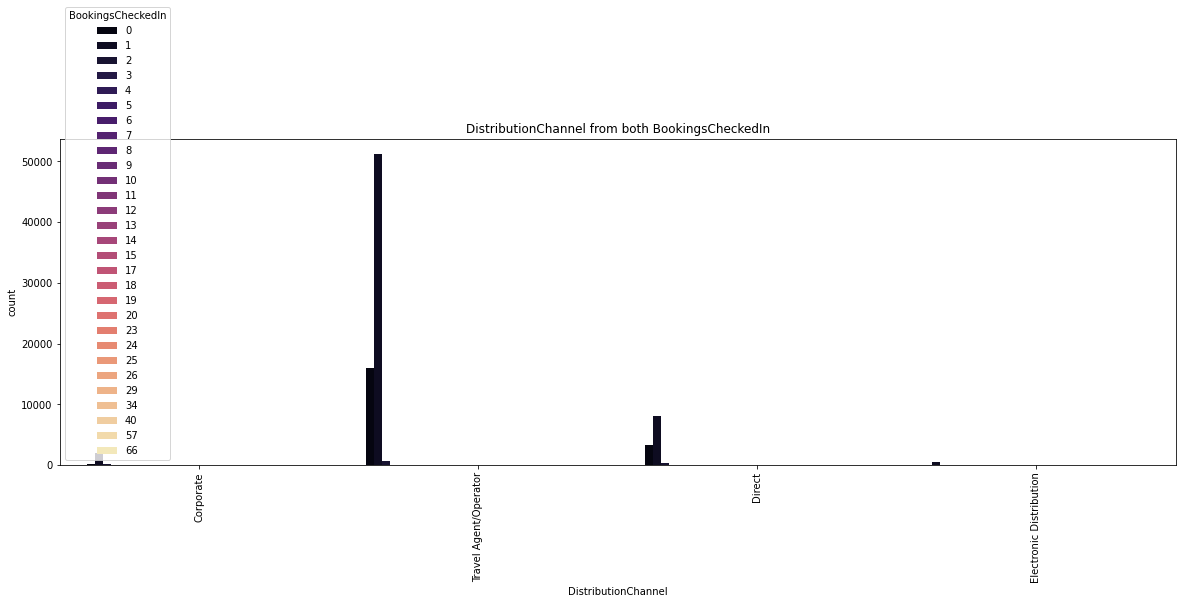

In [24]:
sns.countplot(x='DistributionChannel', data=df, hue='BookingsCheckedIn', palette='magma')
plt.rcParams['figure.figsize'] = (10,4)
plt.xticks(rotation=90)
plt.title('DistributionChannel from both BookingsCheckedIn')
plt.show()

check the analysis of DistributionChannel from both BookingsCheckedIn

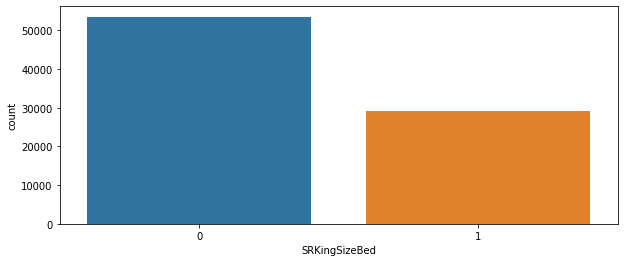

In [25]:
sns.countplot(x='SRKingSizeBed', data=df)
#show the plot using 'plt.show()'
plt.show()

plot who book King size bed

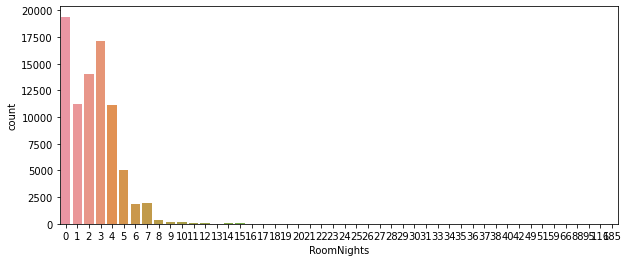

In [26]:
sns.countplot(x='RoomNights', data=df)
#show the plot using 'plt.show()'
plt.show()

plot number of rooms

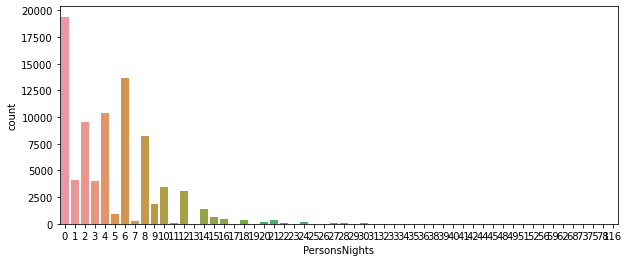

In [27]:
sns.countplot(x='PersonsNights', data=df)
#show the plot using 'plt.show()'
plt.show()

plot number of person night

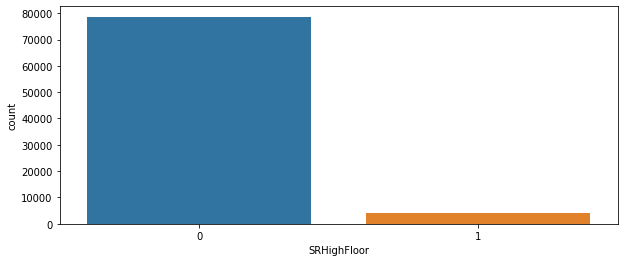

In [28]:
sns.countplot(x='SRHighFloor', data=df)
plt.show()

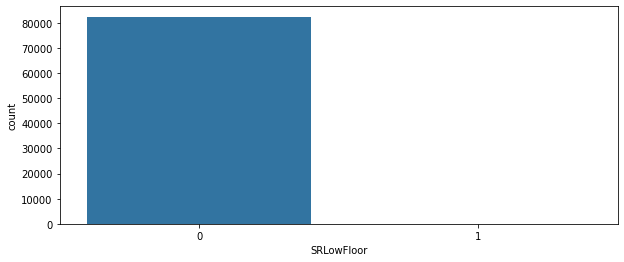

In [29]:
sns.countplot(x='SRLowFloor', data=df)
plt.show()

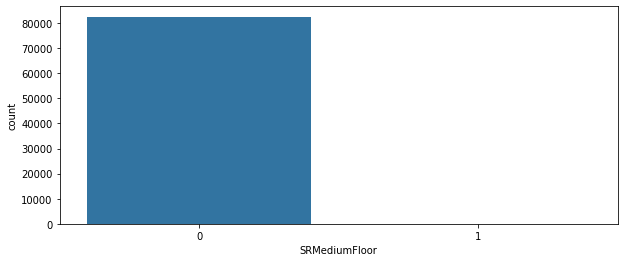

In [30]:
sns.countplot(x='SRMediumFloor', data=df)
plt.show()

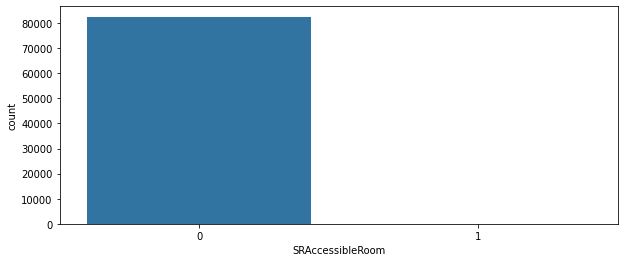

In [31]:
sns.countplot(x='SRAccessibleRoom', data=df)
#show the plot using 'plt.show()'
plt.show()

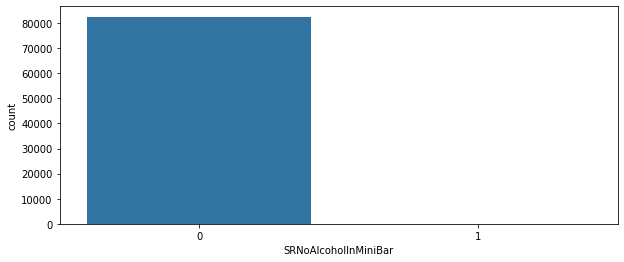

In [32]:
sns.countplot(x='SRNoAlcoholInMiniBar', data=df)
#show the plot using 'plt.show()'
plt.show()

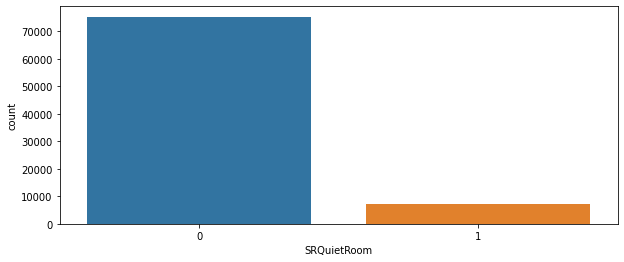

In [33]:
sns.countplot(x='SRQuietRoom', data=df)
#show the plot using 'plt.show()'
plt.show()

<h2>Data Cleaning And Feature Engineering

In [34]:
data.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,source
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,train
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,train
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,train
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,train


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83580 entries, 0 to 83579
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83580 non-null  int64  
 1   Nationality           83580 non-null  object 
 2   Age                   79801 non-null  float64
 3   DaysSinceCreation     83580 non-null  int64  
 4   AverageLeadTime       83580 non-null  int64  
 5   LodgingRevenue        83580 non-null  float64
 6   OtherRevenue          83580 non-null  float64
 7   BookingsCanceled      83580 non-null  int64  
 8   BookingsNoShowed      83580 non-null  int64  
 9   BookingsCheckedIn     83580 non-null  int64  
 10  PersonsNights         83580 non-null  int64  
 11  RoomNights            83580 non-null  int64  
 12  DaysSinceLastStay     83580 non-null  int64  
 13  DaysSinceFirstStay    83580 non-null  int64  
 14  DistributionChannel   83580 non-null  object 
 15  MarketSegment      

In [36]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {data[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {data[col].value_counts()}')

    
for col in data.columns:
    uniquevals(col)
    print("-"*100)

Details of the particular col ID is : [    1     2     3 ... 83588 83589 83590]
----------------------------------------------------------------------------------------------------
Details of the particular col Nationality is : ['PRT' 'DEU' 'FRA' 'JPN' 'IRL' 'ESP' 'BEL' 'NLD' 'AUT' 'ITA' 'CHN' 'RUS'
 'POL' 'USA' 'HUN' 'CRI' 'MEX' 'CHE' 'ROU' 'GBR' 'BIH' 'BRA' 'FIN' 'AGO'
 'CAN' 'ZAF' 'TWN' 'GRC' 'AUS' 'ISR' 'BGR' 'SAU' 'SWE' 'CYP' 'ARG' 'ARM'
 'CHL' 'MAR' 'MOZ' 'KOR' 'TUN' 'DNK' 'NOR' 'MYS' 'EGY' 'IND' 'HRV' 'CPV'
 'JOR' 'COD' 'DZA' 'LUX' 'TUR' 'IRN' 'LBY' 'PAN' 'COL' 'VEN' 'GNB' 'CZE'
 'AND' 'SVN' 'PER' 'ATF' 'UGA' 'AZE' 'NZL' 'LTU' 'SRB' 'EST' 'KAZ' 'KWT'
 'IDN' 'UKR' 'SVK' 'MLI' 'ARE' 'BGD' 'THA' 'TZA' 'LVA' 'PHL' 'BHR' 'NAM'
 'BOL' 'SGP' 'CMR' 'MLT' 'URY' 'PAK' 'JAM' 'ECU' 'SYC' 'QAT' 'PRY' 'BRB'
 'OMN' 'TMP' 'ABW' 'LBN' 'AIA' 'SLV' 'DMA' 'CUB' 'VNM' 'GEO' 'IRQ' 'GAB'
 'PYF' 'LIE' 'SEN' 'BLR' 'ISL' 'DOM' 'GUY' 'LCA' 'ATA' 'NGA' 'RWA' 'CIV'
 'ALB' 'MKD' 'MNE' 'GTM' 'GHA' 'MDV' 'MCO'

<h4> drop greater than 2 in bookingcheckedin

In [37]:
data.drop(data[data['BookingsCheckedIn'] > 2].index, inplace = True)

In [38]:
data['BookingsCheckedIn'].value_counts()

1    62210
0    19915
2     1147
Name: BookingsCheckedIn, dtype: int64

In [39]:
data = data.drop(data.index[data['BookingsCheckedIn'].isin([2])])

In [40]:
data['BookingsCheckedIn'].value_counts()

1    62210
0    19915
Name: BookingsCheckedIn, dtype: int64

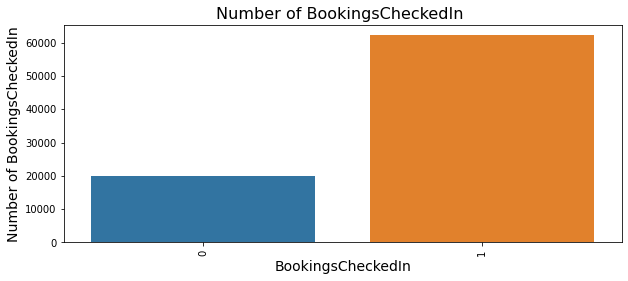

In [41]:
Bookings = data['BookingsCheckedIn'].value_counts()
sns.barplot(Bookings.index, Bookings.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('BookingsCheckedIn', fontsize=14)
plt.ylabel('Number of BookingsCheckedIn', fontsize=14)
plt.title("Number of BookingsCheckedIn ", fontsize=16)
plt.show()

<h4> Treating Missing Values

In [42]:
null_value = data.isnull().sum().sort_values(ascending=False)
null_value_per = data.isnull().mean().sort_values(ascending=False)*100

In [43]:
null_value_data = pd.DataFrame({
    "Features" : null_value.index,
    "No.of Missing_Value" :null_value.values,
    "Percentages of Missing_Value" : null_value_per.values
})
null_value_data

,Features,No.of Missing_Value,Percentages of Missing_Value
0,Age,3673,4.472451
1,ID,0,0.000000
2,SRHighFloor,0,0.000000
3,SRQuietRoom,0,0.000000
4,SRNoAlcoholInMiniBar,0,0.000000
5,SRAwayFromElevator,0,0.000000
6,SRNearElevator,0,0.000000
7,SRTwinBed,0,0.000000
8,SRKingSizeBed,0,0.000000
9,SRCrib,0,0.000000


here only on Age missing values are there

In [44]:
data.drop(data[data['Age'] < 0].index, inplace = True)

replace null values of Age with mean value of Age

In [45]:
data.Age = data.Age.fillna(data.Age.mean())

In [46]:
data.isnull().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
source                  0
dtype: int64

change the type of Age float to int

In [47]:
data['Age'] = data['Age'].astype(int)

In [48]:
age_twenty1=data['Age'].value_counts()[:5]
age_twenty1.to_frame()

,Age
45,5337
50,1992
51,1983
54,1932
53,1903


top five Age who CheckIn booking

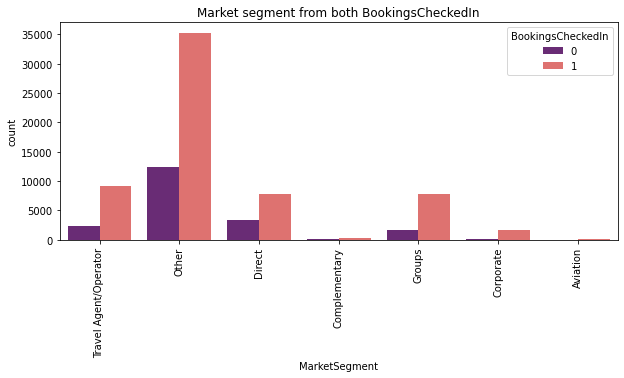

In [49]:
sns.countplot(x='MarketSegment', data=data, hue='BookingsCheckedIn', palette='magma')
plt.rcParams['figure.figsize'] = (20,6)
plt.xticks(rotation=90)
plt.title('Market segment from both BookingsCheckedIn')
plt.show()

Market segment from both BookingsCheckedIn

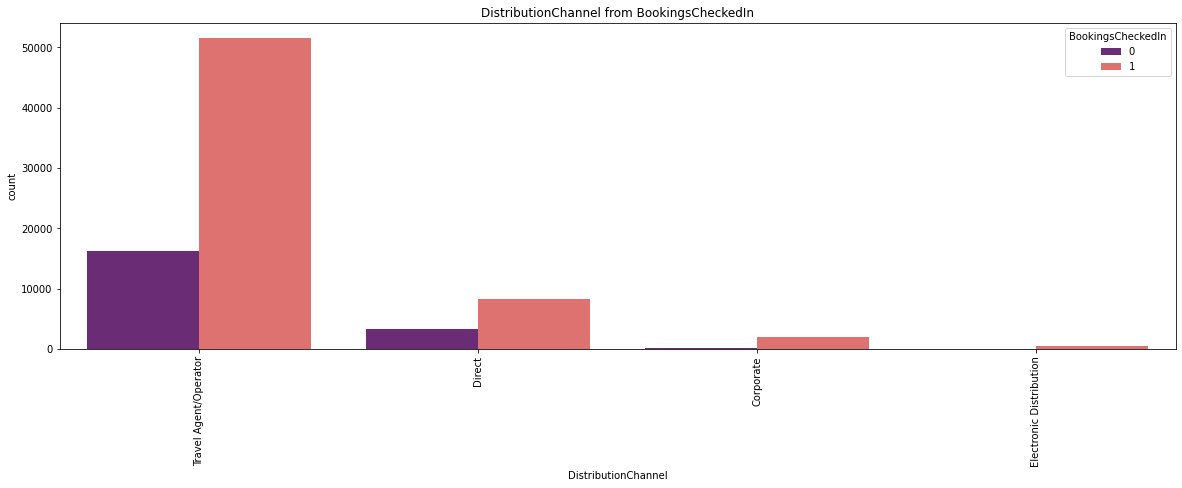

In [50]:
sns.countplot(x='DistributionChannel', data=data, hue='BookingsCheckedIn', palette='magma')
plt.rcParams['figure.figsize'] = (10,4)
plt.xticks(rotation=90)
plt.title('DistributionChannel from BookingsCheckedIn')
plt.show()

In [51]:
data.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,source
1,2,PRT,45,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,train
2,3,DEU,31,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
3,4,FRA,60,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,train
4,5,FRA,51,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
5,6,JPN,54,1095,58,230.0,24.0,0,0,1,...,0,0,0,0,0,0,0,0,0,train


<h4>Encoding

here iam replace the Categorical to Numeric

In [52]:
data['MarketSegment'].value_counts()

Other                    47610
Travel Agent/Operator    11542
Direct                   11107
Groups                    9350
Corporate                 1871
Complementary              460
Aviation                   168
Name: MarketSegment, dtype: int64

In [53]:
data['MarketSegment'] = data['MarketSegment'].replace({ 'Travel Agent/Operator': 0,'Direct': 1,'Groups': 2,'Corporate': 3,'Complementary': 4,'Aviation': 6,'Other': 7})

In [54]:
data['DistributionChannel'].value_counts()

Travel Agent/Operator      67821
Direct                     11569
Corporate                   2223
Electronic Distribution      495
Name: DistributionChannel, dtype: int64

In [55]:
data['DistributionChannel'] = data['DistributionChannel'].replace({ 'Travel Agent/Operator': 0,'Direct': 1,'Corporate': 2,'Electronic Distribution': 3})

drop unwanted columns

In [56]:
data.drop(["ID","Nationality"],axis=1,inplace=True)

In [57]:
train_df=data.loc[data["source"]=="train"]
test_df=data.loc[data["source"]=="test"]

In [58]:
train_df.drop(["source"],axis=1,inplace=True)
test_df.drop(["source","BookingsCheckedIn"],axis=1,inplace=True)

In [59]:
train_df.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
1,45,1095,61,280.0,53.0,0,0,1,10,5,...,0,0,0,0,0,0,0,0,0,0
2,31,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60,1095,93,240.0,60.0,0,0,1,10,5,...,0,0,0,0,0,0,0,0,0,0
4,51,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,54,1095,58,230.0,24.0,0,0,1,4,2,...,0,0,0,0,0,0,0,0,0,0


In [60]:
test_df.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,PersonsNights,RoomNights,DaysSinceLastStay,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
82580,47,11,0,0.00,0.0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
82581,16,11,130,483.48,155.1,0,0,15,5,16,...,0,0,0,0,0,0,0,0,0,0
82582,15,11,0,0.00,0.0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
82583,12,11,0,0.00,0.0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
82584,45,11,0,0.00,0.0,0,0,0,0,-1,...,0,0,0,0,1,0,0,0,0,0


In [61]:
train_df.to_csv("/content/drive/MyDrive/col/hotel_booking/train_modified.csv",index=False)
test_df.to_csv("/content/drive/MyDrive/col/hotel_booking/test_modified.csv",index=False)

In [62]:
train_data_mod=pd.read_csv("/content/drive/MyDrive/col/hotel_booking/train_modified.csv")


<h4>BookingsCheckedIn is unbalance data so we use downsampling method

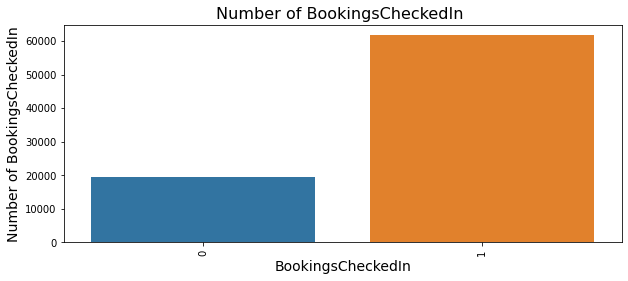

In [63]:
Bookings = train_data_mod['BookingsCheckedIn'].value_counts()
sns.barplot(Bookings.index, Bookings.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('BookingsCheckedIn', fontsize=14)
plt.ylabel('Number of BookingsCheckedIn', fontsize=14)
plt.title("Number of BookingsCheckedIn ", fontsize=16)
plt.show()

In [64]:
#Down sampling
class_1, class_0 = train_data_mod.BookingsCheckedIn.value_counts()
# Divide by class
train_data_mod_class_c = train_data_mod[train_data_mod.BookingsCheckedIn==1]
train_data_mod_class_d = train_data_mod[train_data_mod.BookingsCheckedIn==0]

seed=7
train_data_mod_class_c_under =train_data_mod_class_c.sample(class_0,random_state=seed)
train_data_mod_down = pd.concat([train_data_mod_class_c_under, train_data_mod_class_d], axis=0)

print('Random under-sampling:')
print(train_data_mod.BookingsCheckedIn.value_counts())
print('After Downsampling:')
print(train_data_mod_down.BookingsCheckedIn.value_counts())

Random under-sampling:
1    61722
0    19392
Name: BookingsCheckedIn, dtype: int64
After Downsampling:
1    19392
0    19392
Name: BookingsCheckedIn, dtype: int64


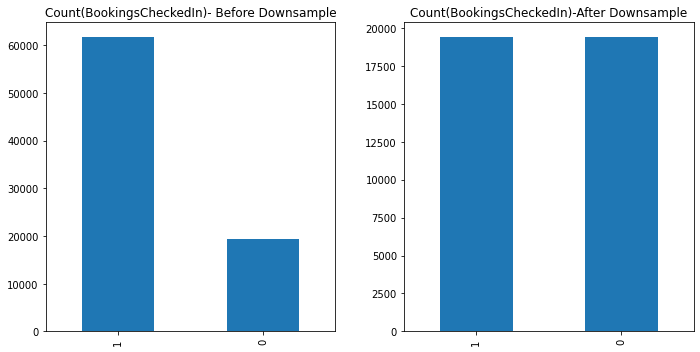

In [65]:
#Graph before after down sampling
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
train_data_mod['BookingsCheckedIn'].value_counts().plot(kind='bar', title='Count(BookingsCheckedIn)- Before Downsample');
plt.subplot(1, 2, 2)
train_data_mod_down.BookingsCheckedIn.value_counts().plot(kind='bar', title='Count(BookingsCheckedIn)-After Downsample');
plt.tight_layout()
plt.show()

<h4>Split X and y

In [66]:
X = train_data_mod_down.drop(['BookingsCheckedIn'], axis=1)
y = train_data_mod_down.BookingsCheckedIn

In [67]:
X.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,PersonsNights,RoomNights,DaysSinceLastStay,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
77083,15,60,230,1980.00,462.0,0,0,12,4,64,...,0,0,0,0,0,1,0,0,0,0
30100,70,560,317,277.20,45.0,0,0,2,1,561,...,0,0,0,0,0,1,0,0,0,1
1788,59,1040,5,127.68,72.5,0,0,2,2,1042,...,0,0,0,0,0,0,0,0,0,0
25828,52,622,52,630.00,84.0,0,0,12,4,626,...,0,0,0,0,0,0,0,0,0,1
77104,39,60,94,330.00,45.5,0,0,6,3,63,...,0,0,0,0,0,0,0,0,0,0


<h4>Feature Selection 

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.2)

In [69]:
from sklearn.ensemble import ExtraTreesClassifier

In [70]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
extra_tree_forest.fit(X, y)

feature_importance = extra_tree_forest.feature_importances_
  
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

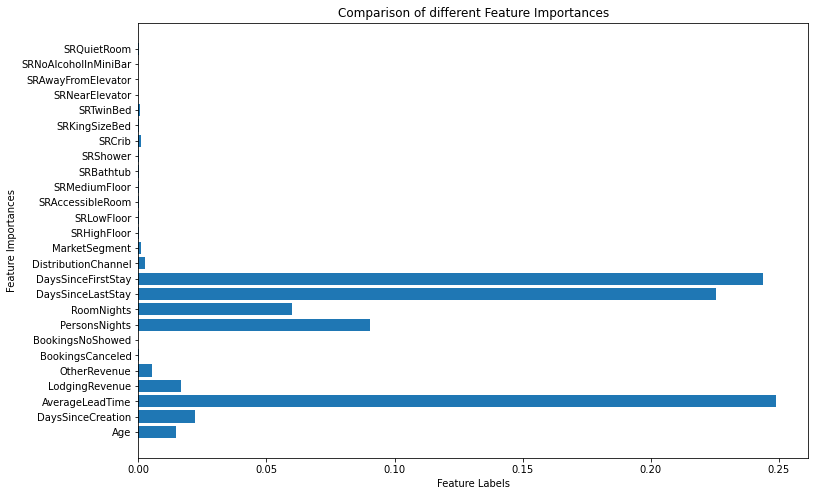

In [71]:
plt.figure(figsize=(12, 8))
plt.barh(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [72]:
X = X[['Age','AverageLeadTime','DaysSinceCreation','PersonsNights','RoomNights','DaysSinceLastStay','DaysSinceFirstStay','DistributionChannel','MarketSegment']]

In [73]:
X.head()

,Age,AverageLeadTime,DaysSinceCreation,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment
77083,15,230,60,12,4,64,64,0,7
30100,70,317,560,2,1,561,561,0,7
1788,59,5,1040,2,2,1042,1042,0,7
25828,52,52,622,12,4,626,626,0,7
77104,39,94,60,6,3,63,63,1,1


<h4>Split X and y to train and test

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.2)

<h2>Model Building

Make Performance Matrix

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
def roc_curve_graph(x_test,y_test,model):
    preds = model. predict_proba(x_test) [:,1]

In [76]:
def metrics_cal(x_test,y_test,prediction,model):    
    print("Model Accuracy:",metrics.accuracy_score(y_test, prediction))
    probs = model.predict_proba(x_test)
    roc_auc = metrics.roc_auc_score(y_test, probs[:,1]) 
    print("ROC:",roc_auc)
    print("Confusion Matrix:",metrics.confusion_matrix(y_test, prediction)) 
    print("Classification Report:", metrics.classification_report(y_test, prediction))  
    print("precision:",metrics.precision_score(y_test, prediction, pos_label=1))  
    print("Recall:",metrics.recall_score(y_test, prediction, pos_label=1))  
    print("F1 Score:",metrics.f1_score(y_test, prediction, pos_label=1))

In [77]:
from sklearn import metrics

def train_test_acc(model,x_train,y_train,x_test,y_test):
    print('Accuracy on training set: {:.2f}'
     .format(model.score(x_train, y_train)))
    print('Accuracy on test set: {:.2f}'
     .format(model.score(x_test, y_test)))

<h3>LogisticRegression

In [78]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression()

In [79]:
prediction=logit.predict(X_test)

train_test_acc(logit,X_train,y_train,X_test,y_test)

metrics_cal(X_test,y_test,prediction,logit)

roc_curve_graph(X_test,y_test,logit)

Accuracy on training set: 1.00
Accuracy on test set: 1.00
Model Accuracy: 1.0
ROC: 1.0
Confusion Matrix: [[3822    0]
 [   0 3935]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3822
           1       1.00      1.00      1.00      3935

    accuracy                           1.00      7757
   macro avg       1.00      1.00      1.00      7757
weighted avg       1.00      1.00      1.00      7757

precision: 1.0
Recall: 1.0
F1 Score: 1.0


<h3>DecisionTreeClassifier

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier().fit(X_train, y_train)

prediction2 = dt_clf.predict(X_test)


In [81]:
train_test_acc(dt_clf,X_train,y_train,X_test,y_test)

metrics_cal(X_test,y_test,prediction2,dt_clf)

roc_curve_graph(X_test,y_test,dt_clf)

Accuracy on training set: 1.00
Accuracy on test set: 1.00
Model Accuracy: 1.0
ROC: 1.0
Confusion Matrix: [[3822    0]
 [   0 3935]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3822
           1       1.00      1.00      1.00      3935

    accuracy                           1.00      7757
   macro avg       1.00      1.00      1.00      7757
weighted avg       1.00      1.00      1.00      7757

precision: 1.0
Recall: 1.0
F1 Score: 1.0


<h3>RandomForestClassifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
randm = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
randm.fit(X_train, y_train)
prediction3 = randm.predict(X_test)

In [83]:
train_test_acc(randm,X_train,y_train,X_test,y_test)

metrics_cal(X_test,y_test,prediction3,randm)

roc_curve_graph(X_test,y_test,randm)

Accuracy on training set: 1.00
Accuracy on test set: 1.00
Model Accuracy: 1.0
ROC: 1.0
Confusion Matrix: [[3822    0]
 [   0 3935]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3822
           1       1.00      1.00      1.00      3935

    accuracy                           1.00      7757
   macro avg       1.00      1.00      1.00      7757
weighted avg       1.00      1.00      1.00      7757

precision: 1.0
Recall: 1.0
F1 Score: 1.0


<h2>Build a model (ANN) in tensorflow/keras

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [85]:
import tensorflow as tf
from tensorflow import keras

In [86]:
model = keras.Sequential([
    keras.layers.Dense(9, input_shape=(9,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [87]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [88]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
970/970 [==============================] - 4s 3ms/step - loss: 1.1034 - accuracy: 0.9654
Epoch 2/10
970/970 [==============================] - 3s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 3/10
970/970 [==============================] - 2s 2ms/step - loss: 4.6162e-04 - accuracy: 1.0000
Epoch 4/10
970/970 [==============================] - 1s 1ms/step - loss: 2.3459e-04 - accuracy: 1.0000
Epoch 5/10
970/970 [==============================] - 1s 1ms/step - loss: 1.2711e-04 - accuracy: 1.0000
Epoch 6/10
970/970 [==============================] - 1s 1ms/step - loss: 6.4902e-05 - accuracy: 1.0000
Epoch 7/10
970/970 [==============================] - 1s 1ms/step - loss: 3.3666e-05 - accuracy: 1.0000
Epoch 8/10
970/970 [==============================] - 1s 1ms/step - loss: 1.6320e-05 - accuracy: 1.0000
Epoch 9/10
970/970 [==============================] - 1s 1ms/step - loss: 2.5731e-06 - accuracy: 1.0000
Epoch 10/10
970/970 [==============================] - 1s 1ms/step - los

In [89]:
y_pred = model.predict(X_test)

In [90]:
y_pred

array([[3.4756674e-19],
       [1.0000000e+00],
       [0.0000000e+00],
       ...,
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [91]:
y_pred = y_pred.argmax(axis=-1)

In [92]:
model.evaluate(X_test, y_test)

243/243 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 0.9999


[0.0050491029396653175, 0.9998710751533508]

In [93]:
yp = model.predict(X_test)
yp[:5]

array([[3.4756674e-19],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [94]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [95]:
y_pred[:10]

[0, 1, 0, 0, 1, 0, 0, 1, 1, 1]

In [96]:
y_test[:10]

75210    0
16154    1
53324    0
53503    0
27438    1
57035    0
76756    0
57410    1
19399    1
51198    1
Name: BookingsCheckedIn, dtype: int64

In [97]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

[[3822    0]
 [   1 3934]]
99.98710841820291
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3822
           1       1.00      1.00      1.00      3935

    accuracy                           1.00      7757
   macro avg       1.00      1.00      1.00      7757
weighted avg       1.00      1.00      1.00      7757



Text(69.0, 0.5, 'Truth')

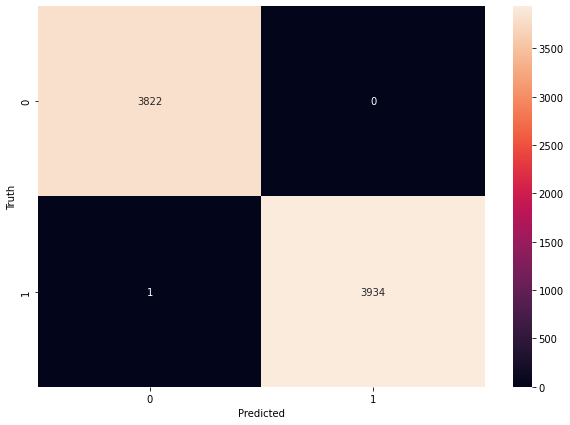

In [98]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3>Save model

In [99]:
import pickle
#open a file, where you want to store the data
file = open('/content/drive/MyDrive/col/hotel_booking/model.pkl', 'wb')

# dump information to that file
pickle.dump(dt_clf, file)
file.close()

<h4>Read Model

In [100]:
with open("/content/drive/MyDrive/col/hotel_booking/model.pkl","rb") as file1:
   model=pickle.load(file1)

test csv file

In [101]:
test_df.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,PersonsNights,RoomNights,DaysSinceLastStay,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
82580,47,11,0,0.00,0.0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
82581,16,11,130,483.48,155.1,0,0,15,5,16,...,0,0,0,0,0,0,0,0,0,0
82582,15,11,0,0.00,0.0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
82583,12,11,0,0.00,0.0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
82584,45,11,0,0.00,0.0,0,0,0,0,-1,...,0,0,0,0,1,0,0,0,0,0


In [102]:
testcsv = test_df[['Age','AverageLeadTime','DaysSinceCreation','PersonsNights','RoomNights','DaysSinceLastStay','DaysSinceFirstStay','DistributionChannel','MarketSegment']]

In [103]:
testcsv.head()

,Age,AverageLeadTime,DaysSinceCreation,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment
82580,47,0,11,0,0,-1,-1,0,7
82581,16,130,11,15,5,16,16,0,7
82582,15,0,11,0,0,-1,-1,0,7
82583,12,0,11,0,0,-1,-1,0,7
82584,45,0,11,0,0,-1,-1,0,7


model prediction with test Csv file

In [104]:
testcsv['BookingsCheckedIn'] = (model.predict(testcsv)).tolist()

In [105]:
testcsv.head()

,Age,AverageLeadTime,DaysSinceCreation,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,BookingsCheckedIn
82580,47,0,11,0,0,-1,-1,0,7,0
82581,16,130,11,15,5,16,16,0,7,1
82582,15,0,11,0,0,-1,-1,0,7,0
82583,12,0,11,0,0,-1,-1,0,7,0
82584,45,0,11,0,0,-1,-1,0,7,0


In [106]:
#Save Output dataframe in csv file
testcsv.to_csv("/content/drive/MyDrive/col/hotel_booking/Test_Output.csv",index=False)